GroupGal : 83093
EnvMeasures : 67996
EnvMeasures : 56228
visualMorph : 38795
['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG']
Joining envMeasures VisualMorph 8932
8932
['CATAID', 'RA', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIS

/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_48527/125699083.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bin'] = pd.cut(df2[xfield], n)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10]
                  bin  ELLIPTICAL_CODE  Counts  group
0   (-0.00121, 0.121]                1    1299      1
1   (-0.00121, 0.121]                2     230      1
2   (-0.00121, 0.121]               10    3942      1
3      (0.121, 0.243]                1     351      2
4      (0.121, 0.243]                2      79      2
5      (0.121, 0.243]               10    1641      2
6      (0.243, 0.364]                1     160      3
7      (0.243, 0.364]                2      20      3
8      (0.243, 0.364]               10     535      3
9      (0.364, 0.485]                1      75      4
10     (0.364, 0.485]                2       9      4
11     (0.364, 0.485]               10     236      4
12     (0.485, 0.606]                1      48      5
13     (0.485, 0.606]                2       3      5
14     (0.485, 0.606]               10     124      5
15     (0.606, 0.728]                1    

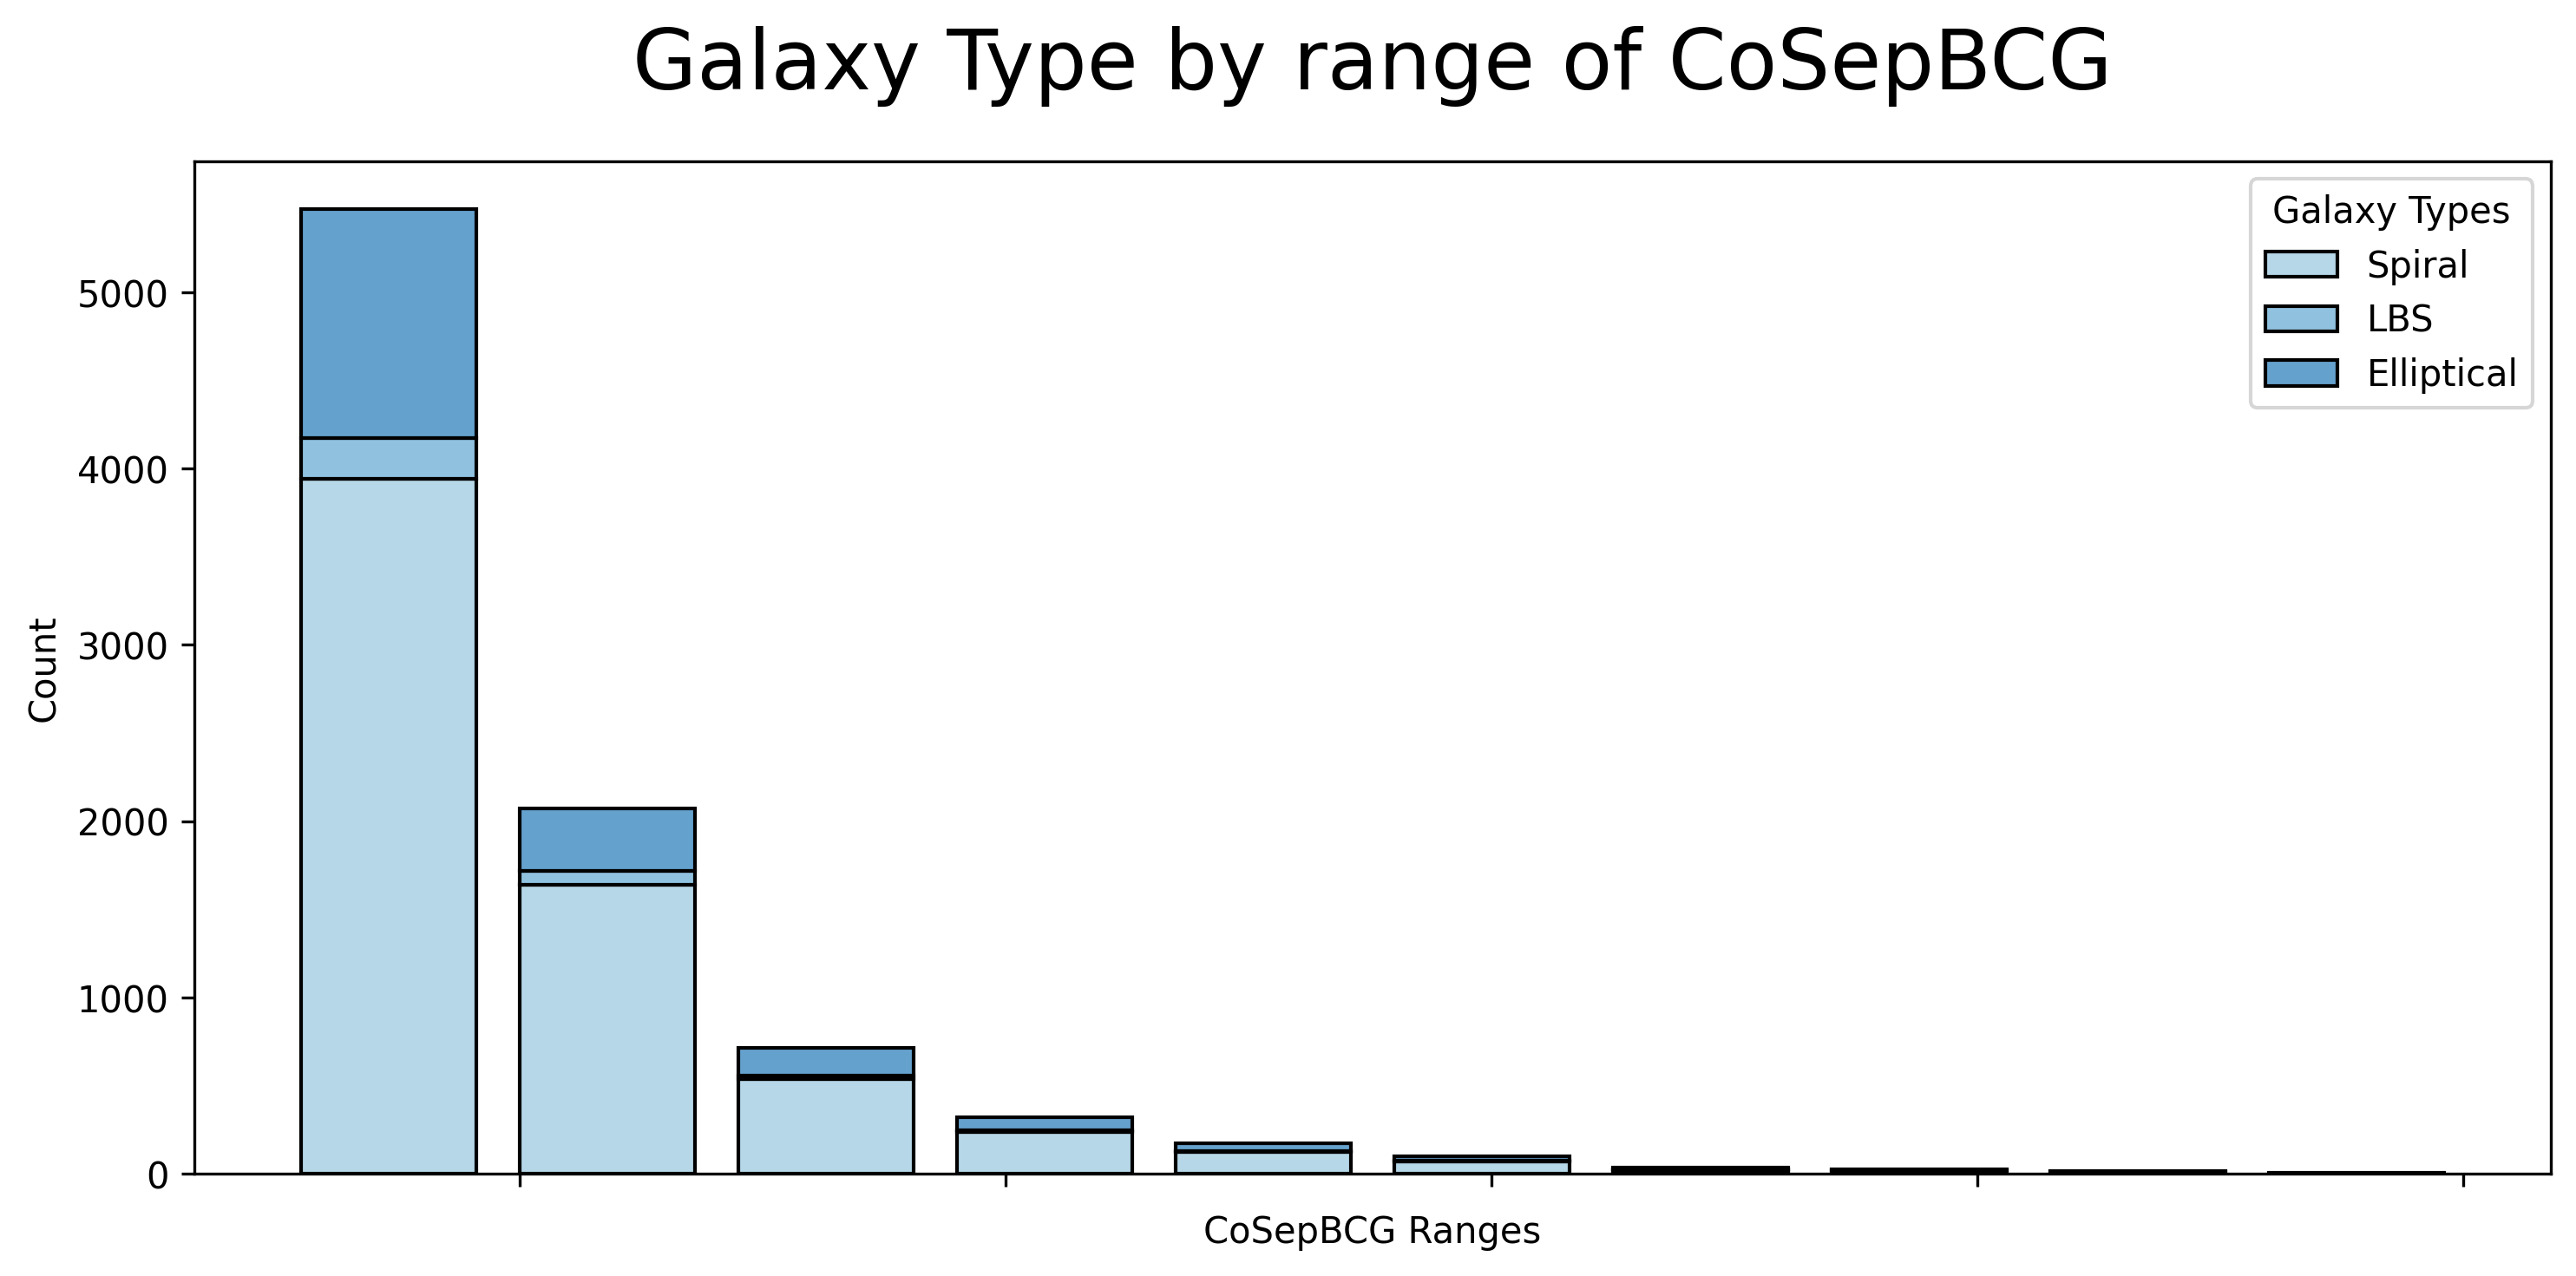

SumCounts
                       Counts
group ELLIPTICAL_CODE        
1     1                  1299
      2                   230
      10                 3942
2     1                   351
      2                    79
      10                 1641
3     1                   160
      2                    20
      10                  535
4     1                    75
      2                     9
      10                  236
5     1                    48
      2                     3
      10                  124
6     1                    25
      2                     3
      10                   71
7     1                     9
      2                     3
      10                   21
8     1                     6
      2                     1
      10                   20
9     1                     6
      2                     0
      10                   11
10    1                     1
      2                     0
      10                    3
Range
       Counts
group     

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


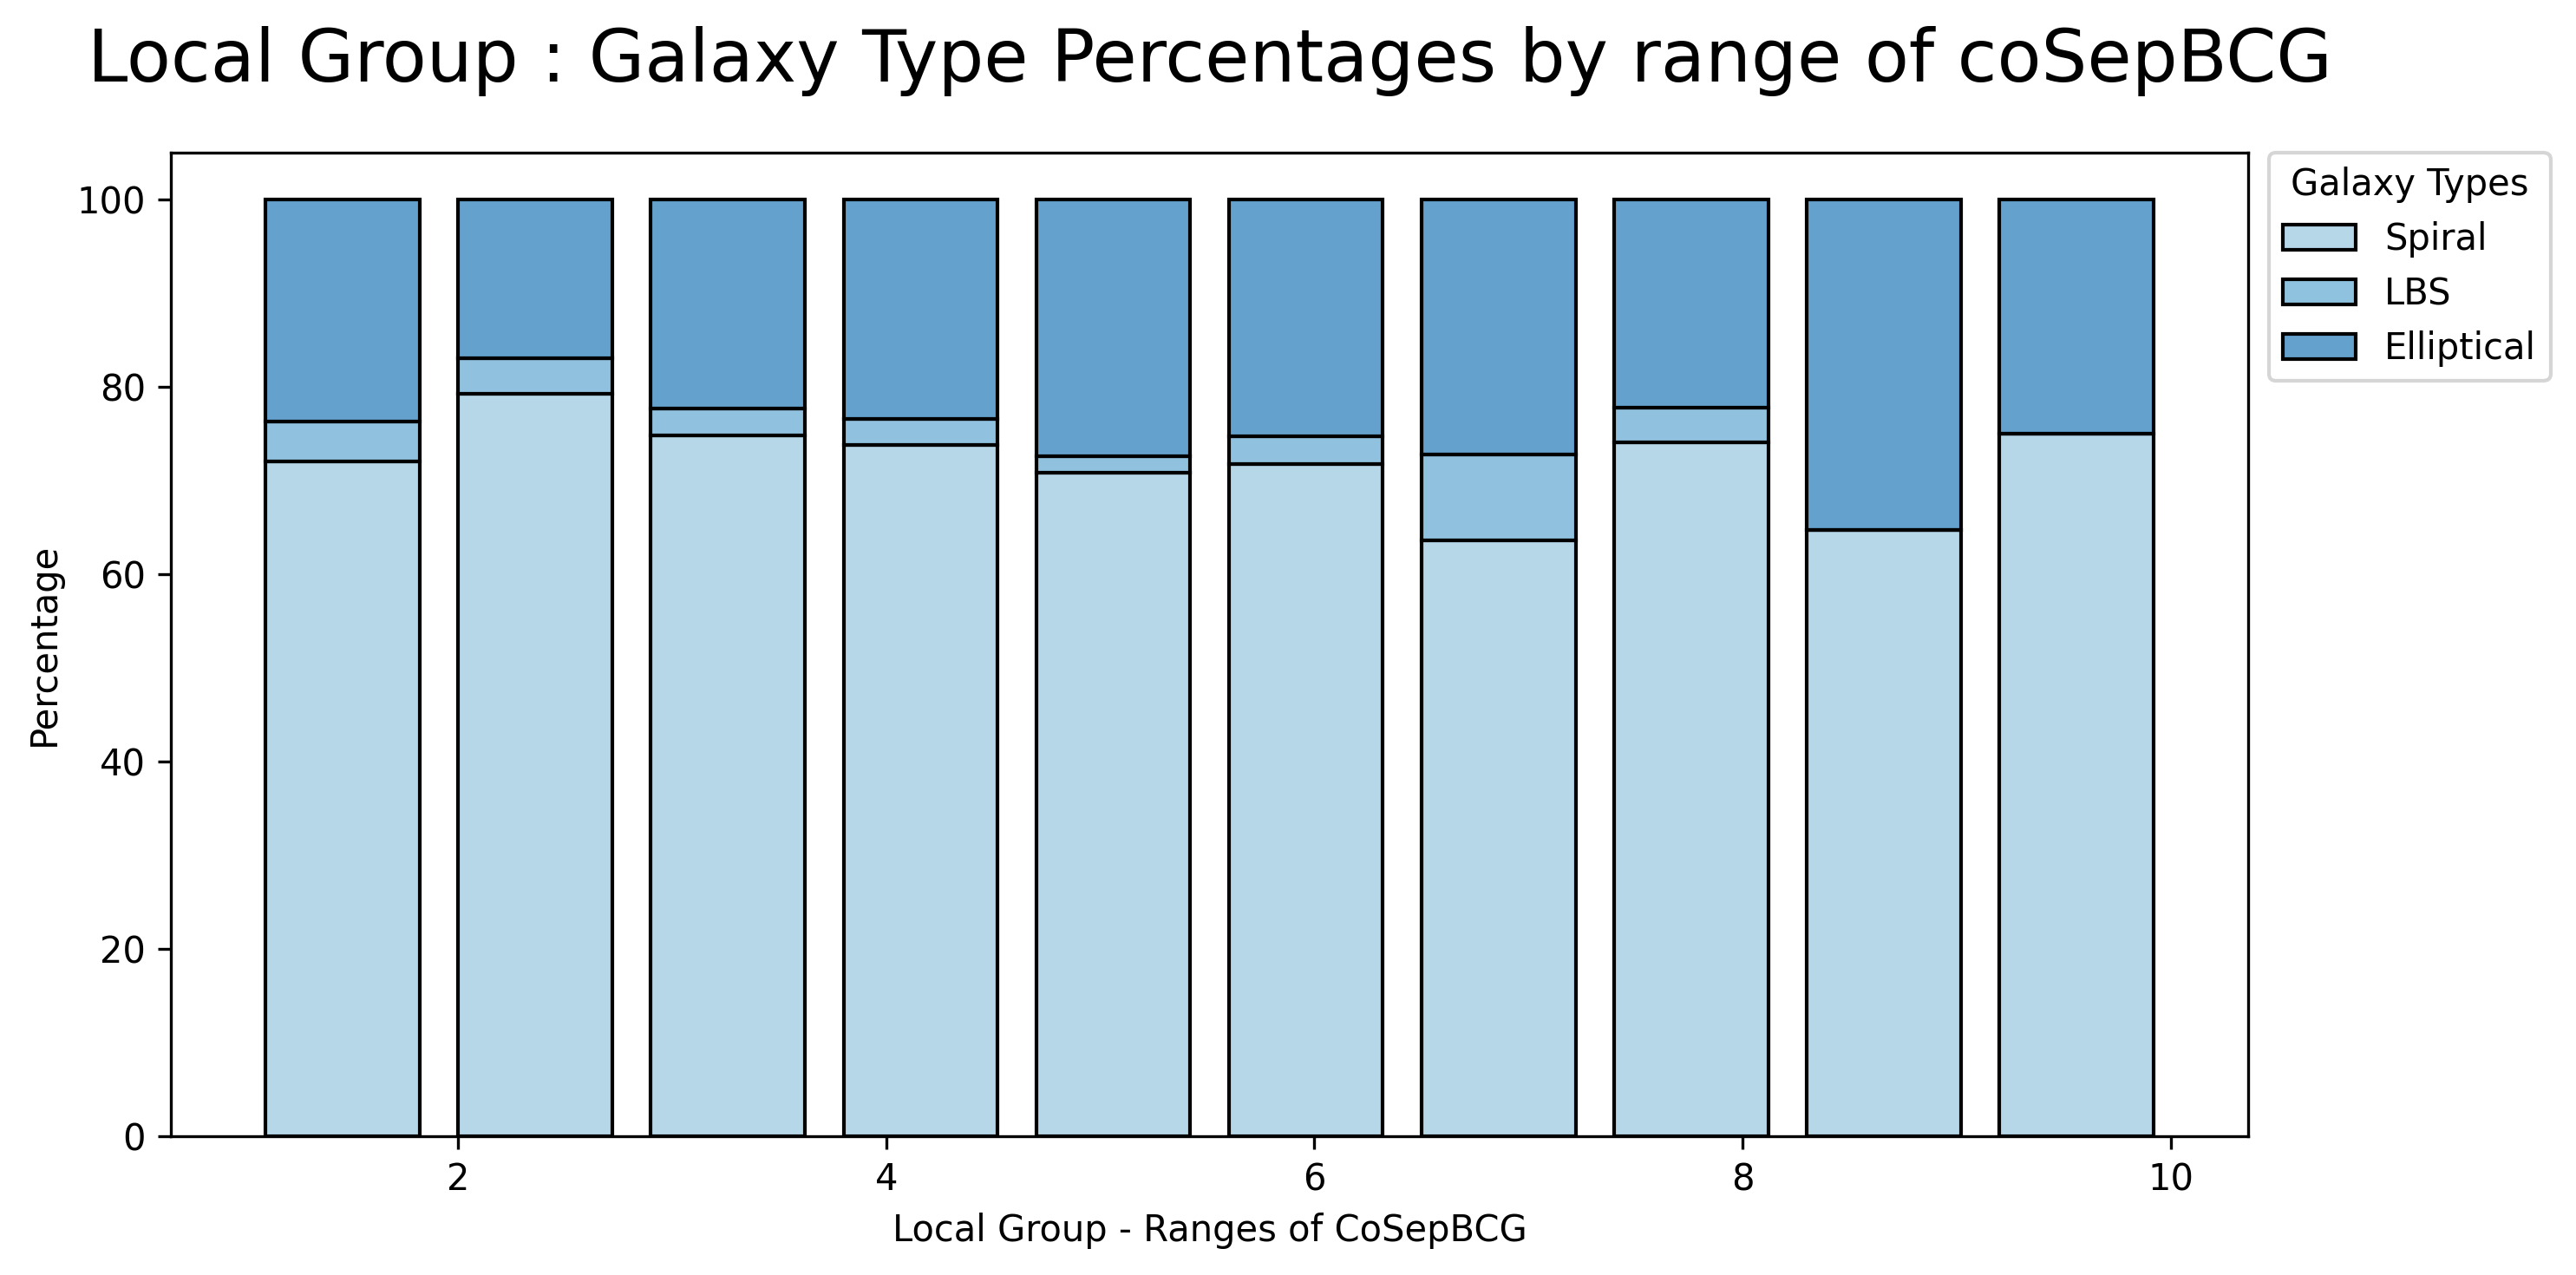

In [11]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import statistics as st

#ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
#print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"GroupGal : {len(GroupGal)}")

envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]
print(f"EnvMeasures : {len(envMeasures)}")

#envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')
# Clean Data

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
print(visualMorph.colnames)
## Clean Data
#visualMorphElliptical = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]
#visualMorphSpiral = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 10]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] != 0]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] < 50]

RErange = join(GroupGal,visualMorph,keys='CATAID',join_type='inner')
print('Joining envMeasures VisualMorph '+str(len(RErange)))
print(len(RErange))
print(RErange.colnames)

alphaVal = .3
binCount = 100

    
fig = plt.figure(figsize=(10, 5), dpi=300)
n = 10
r = 3
xfield = 'CoSepBCG'
df = RErange.to_pandas()    
df2 = df[['ELLIPTICAL_CODE',xfield]]
df2['bin'] = pd.cut(df2[xfield], n)
df3 = df2.groupby(['bin','ELLIPTICAL_CODE']).size().reset_index(name='Counts')
lst = []
for i in range(1,n+1) :
  lst = lst + [i]*r 
print(lst)
df3['group']=lst
print(df3)
#df4 = df3.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
df5=df3.set_index(['group','ELLIPTICAL_CODE'])
print(df5)
g=sns.histplot(df5, x='group', hue='ELLIPTICAL_CODE', weights='Counts',
             multiple='stack', palette='tab20c', shrink=0.8)
#            multiple='stack', palette='tab20c', shrink=0.8)
g.set_title('Galaxy Type by range of '+xfield, fontsize = 23, y =1.05);
g.set_xlabel(xfield+' Ranges')
#g.set_xlim([1,7])
g.set(xticklabels=[])
plt.legend(title='Galaxy Types', loc='upper right', labels=['Spiral', 'LBS','Elliptical'])
plt.rcParams["figure.figsize"]=(6,12)
fig.tight_layout()
fig.savefig('../../ChartsPlots/Histogram_GalaxyTypes_CoSepBCG.png', dpi=300, bbox_inches='tight')                      
plt.show(g)

SumCounts = df3.groupby(['group', 'ELLIPTICAL_CODE']).agg({'Counts': 'sum'})
print('SumCounts')
print(SumCounts)
Range = df3.groupby(['group']).agg({'Counts': 'sum'})
print('Range')
print(Range)
Percent=SumCounts.div(Range, level='group') * 100
print('Count is percentage')
print(Percent)

fig = plt.figure(figsize=(10, 5), dpi=300) 
g=sns.histplot(Percent, x='group', hue='ELLIPTICAL_CODE', weights='Counts',
             multiple='stack', palette='tab20c', shrink=0.8)
g.set_title('Local Group : Galaxy Type Percentages by range of coSepBCG', fontsize = 20, y =1.05);
g.set_xlabel('Local Group - Ranges of CoSepBCG')
g.set_ylabel('Percentage')
#g.set_xlim([1,7])
#g.set(xticklabels=[])

plt.legend(title='Galaxy Types', loc='upper left', labels=['Spiral', 'LBS','Elliptical'],        
  bbox_to_anchor=(1.01, 1), borderaxespad=0)
#plt.rcParams["figure.figsize"]=(6,12)
fig.tight_layout()
fig.savefig('../../ChartsPlots/Histogram_Percentage_Range_CoSepBCG.png', dpi=300, bbox_inches='tight')                      
plt.show(g)


